In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('./CSVs/TSLA_03182020')

In [14]:
df.head()

,1. open,2. high,3. low,4. close,5. volume,date
0,389.0000,404.8600,378.24,387.32,10014454,2020-03-18
1,440.0100,471.8500,396.00,430.20,23822559,2020-03-17
2,469.4997,494.8699,442.17,445.07,20489464,2020-03-16
3,595.0000,607.5700,502.00,546.62,22640254,2020-03-13
4,580.8900,594.5000,546.25,560.55,18909052,2020-03-12


In [15]:
df.shape

(100, 6)

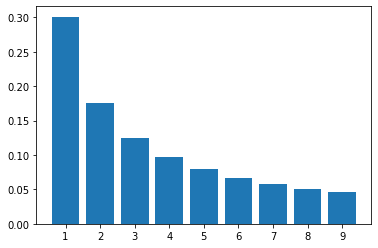

In [16]:
# Benford's Law example
digits = list(range(1,10))
benford = [np.log10(1 + 1/d) for d in digits]
plt.bar(digits, benford)
plt.xticks(digits);

# Trading Volume

In [17]:
df['first_digit_volume'] = df['5. volume'].map(lambda a: str(a)[0]).astype(int)
df.head()

,1. open,2. high,3. low,4. close,5. volume,date,first_digit_volume
0,389.0000,404.8600,378.24,387.32,10014454,2020-03-18,1
1,440.0100,471.8500,396.00,430.20,23822559,2020-03-17,2
2,469.4997,494.8699,442.17,445.07,20489464,2020-03-16,2
3,595.0000,607.5700,502.00,546.62,22640254,2020-03-13,2
4,580.8900,594.5000,546.25,560.55,18909052,2020-03-12,1


In [18]:
# Checking the value counts
actual_vol = df['first_digit_volume'].value_counts(normalize = True).sort_index()
actual_vol

1    0.44
2    0.17
3    0.05
4    0.04
5    0.03
6    0.11
7    0.06
8    0.05
9    0.05
Name: first_digit_volume, dtype: float64

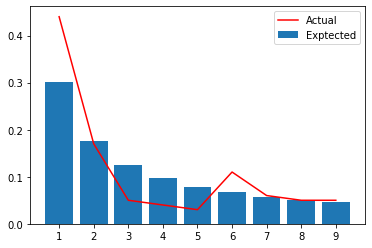

In [19]:
# trading volume by day
plt.bar(digits, benford, label='Exptected')
plt.plot(actual_vol, color='r', label='Actual')
plt.xticks(digits)
plt.legend();

# Open and close difference

In [20]:
df['diff'] = np.abs(df['4. close'] - df['1. open'])
df.head()

,1. open,2. high,3. low,4. close,5. volume,date,first_digit_volume,diff
0,389.0000,404.8600,378.24,387.32,10014454,2020-03-18,1,1.6800
1,440.0100,471.8500,396.00,430.20,23822559,2020-03-17,2,9.8100
2,469.4997,494.8699,442.17,445.07,20489464,2020-03-16,2,24.4297
3,595.0000,607.5700,502.00,546.62,22640254,2020-03-13,2,48.3800
4,580.8900,594.5000,546.25,560.55,18909052,2020-03-12,1,20.3400


In [21]:
df['first_digit_diff'] = df['diff'].map(lambda a: str(a)[0]).astype(int)
df.head()

,1. open,2. high,3. low,4. close,5. volume,date,first_digit_volume,diff,first_digit_diff
0,389.0000,404.8600,378.24,387.32,10014454,2020-03-18,1,1.6800,1
1,440.0100,471.8500,396.00,430.20,23822559,2020-03-17,2,9.8100,9
2,469.4997,494.8699,442.17,445.07,20489464,2020-03-16,2,24.4297,2
3,595.0000,607.5700,502.00,546.62,22640254,2020-03-13,2,48.3800,4
4,580.8900,594.5000,546.25,560.55,18909052,2020-03-12,1,20.3400,2


In [22]:
# Checking the value counts
actuals_diff = df['first_digit_diff'].value_counts(normalize = True).sort_index()[1:]
actuals_diff

1    0.28
2    0.15
3    0.12
4    0.08
5    0.10
6    0.07
7    0.07
8    0.05
9    0.01
Name: first_digit_diff, dtype: float64

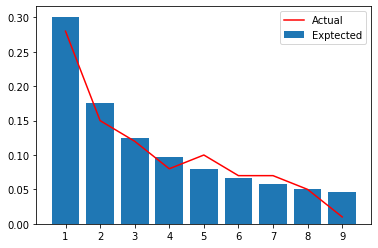

In [23]:
# trading volume by day
plt.bar(digits, benford, label='Exptected')
plt.plot(actuals_diff, color='r', label='Actual')
plt.xticks(digits)
plt.legend();